In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

#### No TL

In [2]:
path = '../Results/'
t1 = pd.read_csv(path+'RawT1_CNN_NoTL_pred.txt',delim_whitespace=True)
t1.columns = ['ID', 't1']
gm = pd.read_csv(path+'GrayMatter_CNN_NoTL_pred.txt',delim_whitespace=True)
gm.columns = ['ID', 'gm']
wm = pd.read_csv(path+'WhiteMatter_CNN_NoTL_pred.txt',delim_whitespace=True)
wm.columns = ['ID', 'wm']
jac = pd.read_csv(path+'Jacobian_CNN_NoTL_pred.txt',delim_whitespace=True)
jac.columns = ['ID', 'jac']

In [3]:
data = pd.merge(t1[['ID','t1']],gm[['ID','gm']],on='ID')
data = pd.merge(data,wm[['ID','wm']],on='ID')
data = pd.merge(data,jac[['ID','jac']],on='ID')
data['meanPrediction'] = np.mean(data[['t1','gm','wm','jac']].values,axis=1)
data['sdPrediction'] = np.std(data[['t1','gm','wm','jac']].values,axis=1)
pnInfo = pd.read_csv('../Data/ukb2489_id2pn.txt',delim_whitespace=True,header=None)
pnInfo.columns = ['ID','PN']
data = pd.merge(data,pnInfo,how='inner',on='ID')
ageInfo = pd.read_csv('../Data/UK_Biobank_ImagingVisitAge2.txt',delim_whitespace=True)
ageInfo.columns = ['ID','Age']
data = pd.merge(data,ageInfo,how='inner',on='ID')

8.486189271382752
-0.6107772740189168


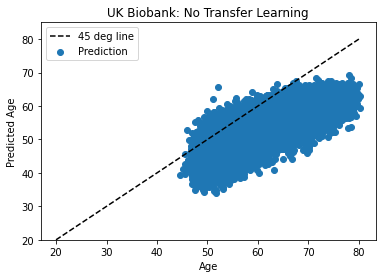

In [4]:
target = data.Age
pred = data.meanPrediction
print(mae(target,pred))
print(r2(target,pred))
plt.scatter(target,pred,label='Prediction')
ageRange = np.linspace(20,80)
plt.plot(ageRange,ageRange,color='black',ls='dashed',label='45 deg line')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Predicted Age')
plt.ylim(20,85)
plt.title('UK Biobank: No Transfer Learning')
plt.show()


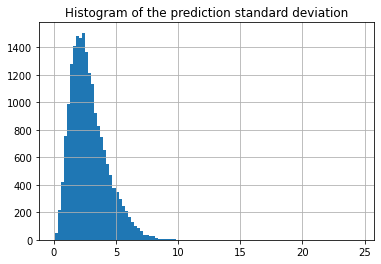

MAE for prediction SD between (0.071, 1.302] is 8.432597159609122 years
MAE for prediction SD between (1.302, 1.75] is 8.440727619299674 years
MAE for prediction SD between (1.75, 2.16] is 8.269375942542785 years
MAE for prediction SD between (2.16, 2.566] is 8.28868288913751 years
MAE for prediction SD between (2.566, 3.034] is 8.32246934039088 years
MAE for prediction SD between (3.034, 3.653] is 8.346856097919217 years
MAE for prediction SD between (3.653, 4.587] is 8.585379383706721 years
MAE for prediction SD between (4.587, 24.548] is 9.203166744299676 years


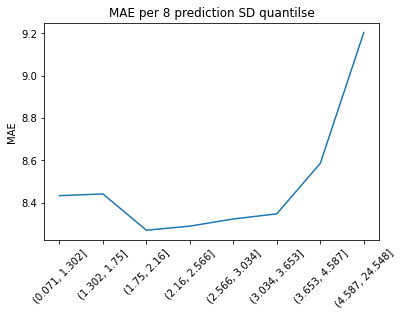

In [5]:
data.sdPrediction.hist(bins=100)
plt.title('Histogram of the prediction standard deviation')
plt.show()

nQuant = 8
data['sdQuartile'] = pd.qcut(np.round(data.sdPrediction,3), q=8)
data['AbsoluteError'] = np.absolute(data.Age-data.meanPrediction)

maeForSDQuartiles = []
for case in np.unique(data['sdQuartile']):
    tmp = data[data['sdQuartile']==case].AbsoluteError.values
    print('MAE for prediction SD between {} is {} years'.format(case,np.mean(tmp)))
    maeForSDQuartiles.append(tmp)
    
plt.plot(range(len( maeForSDQuartiles)),[np.mean(x) for x in maeForSDQuartiles])
plt.ylabel('MAE')

plt.xticks(range(len( maeForSDQuartiles)),labels = np.unique(data['sdQuartile']).astype(str),rotation=45)
plt.title('MAE per {} prediction SD quantilse'.format(nQuant))
plt.show()

#### With TL

In [6]:
t1 = pd.read_csv(path+'RawT1_CNN_WithTL_pred.txt',delim_whitespace=True)
t1.columns = ['ID', 't1']
gm = pd.read_csv(path+'GrayMatter_CNN_WithTL_pred.txt',delim_whitespace=True)
gm.columns = ['ID', 'gm']
wm = pd.read_csv(path+'WhiteMatter_CNN_WithTL_pred.txt',delim_whitespace=True)
wm.columns = ['ID', 'wm']
jac = pd.read_csv(path+'Jacobian_CNN_WithTL_pred.txt',delim_whitespace=True)
jac.columns = ['ID', 'jac']

In [7]:
data = pd.merge(t1[['ID','t1']],gm[['ID','gm']],on='ID')
data = pd.merge(data,wm[['ID','wm']],on='ID')
data = pd.merge(data,jac[['ID','jac']],on='ID')
data['meanPrediction'] = np.mean(data[['t1','gm','wm','jac']].values,axis=1)
data['sdPrediction'] = np.std(data[['t1','gm','wm','jac']].values,axis=1)
pnInfo = pd.read_csv('../Data/ukb2489_id2pn.txt',delim_whitespace=True,header=None)
pnInfo.columns = ['ID','PN']
data = pd.merge(data,pnInfo,how='inner',on='ID')
ageInfo = pd.read_csv('../Data/UK_Biobank_ImagingVisitAge2.txt',delim_whitespace=True)
ageInfo.columns = ['ID','Age']
data = pd.merge(data,ageInfo,how='inner',on='ID')

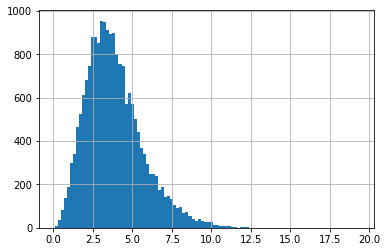

In [8]:
data.sdPrediction.hist(bins=100)
plt.show()

MAE: 3.9247469568399347
R^2: 0.5621353493173282


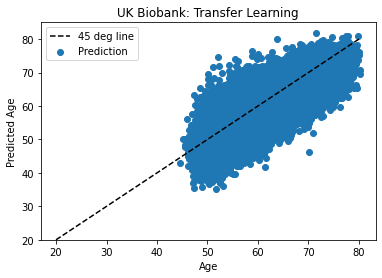

In [9]:
target = data.Age
pred = data.meanPrediction
print('MAE: {}'.format(mae(target,pred)))
print('R^2: {}'.format(r2(target,pred)))
plt.scatter(target,pred,label='Prediction')
ageRange = np.linspace(20,80)
plt.plot(ageRange,ageRange,color='black',ls='dashed',label='45 deg line')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Predicted Age')
plt.ylim(20,85)
plt.title('UK Biobank: Transfer Learning')
plt.show()

In [10]:
data.to_csv('../Results/CombinedResNetPredictions.csv')

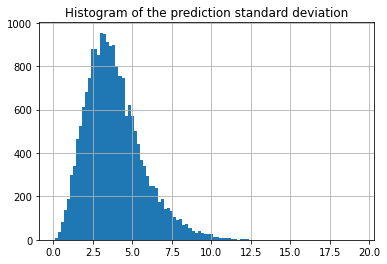

MAE for prediction SD between (0.08, 1.935] is 3.602528451809678 years
MAE for prediction SD between (1.935, 2.565] is 3.715136535976355 years
MAE for prediction SD between (2.565, 3.096] is 3.680418262713588 years
MAE for prediction SD between (3.096, 3.607] is 3.731293122654976 years
MAE for prediction SD between (3.607, 4.164] is 3.8011893202075697 years
MAE for prediction SD between (4.164, 4.863] is 3.860365798939641 years
MAE for prediction SD between (4.863, 5.953] is 4.102497797434854 years
MAE for prediction SD between (5.953, 19.349] is 4.904912352240326 years


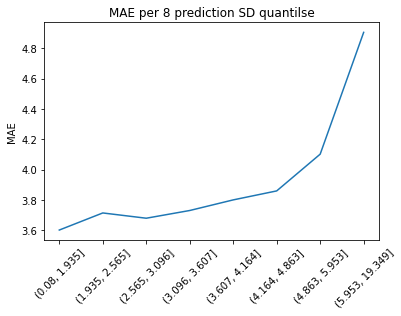

In [11]:
data.sdPrediction.hist(bins=100)
plt.title('Histogram of the prediction standard deviation')
plt.show()

nQuant = 8
data['sdQuartile'] = pd.qcut(np.round(data.sdPrediction,3), q=8)
data['AbsoluteError'] = np.absolute(data.Age-data.meanPrediction)

maeForSDQuartiles = []
for case in np.unique(data['sdQuartile']):
    tmp = data[data['sdQuartile']==case].AbsoluteError.values
    print('MAE for prediction SD between {} is {} years'.format(case,np.mean(tmp)))
    maeForSDQuartiles.append(tmp)
    
plt.plot(range(len( maeForSDQuartiles)),[np.mean(x) for x in maeForSDQuartiles])
plt.ylabel('MAE')

plt.xticks(range(len( maeForSDQuartiles)),labels = np.unique(data['sdQuartile']).astype(str),rotation=45)
plt.title('MAE per {} prediction SD quantilse'.format(nQuant))
plt.show()

MAE: 3.7060674578155655
R^2: 0.561621929446644


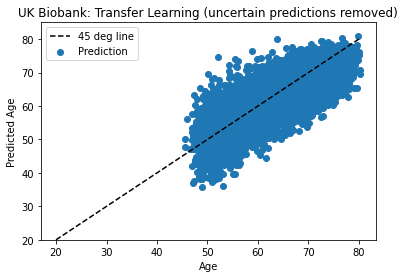

In [12]:
data = data[data.sdPrediction< 4.155]
target = data.Age
pred = data.meanPrediction
print('MAE: {}'.format(mae(target,pred)))
print('R^2: {}'.format(r2(target,pred)))
plt.scatter(target,pred,label='Prediction')
ageRange = np.linspace(20,80)
plt.plot(ageRange,ageRange,color='black',ls='dashed',label='45 deg line')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Predicted Age')
plt.ylim(20,85)
plt.title('UK Biobank: Transfer Learning (uncertain predictions removed)')
plt.show()